# <span style="color: #5D3FD3">**filtered financial data**  </span>

## <span style="color: #5D3FD3">**Group number - 18**  </span>

###  Names of students:
- noam mazri<br>
- yarin goldhirsh<br>
- omri ohana<br>

From:
Link to Kaggle:https://www.kaggle.com/datasets/cnic92/200-financial-indicators-of-us-stocks-20142018?select=2014_Financial_Data.csv <br>
Kaggle sources: https://site.financialmodelingprep.com/developer/docs#general-search-company-search 


<a id='top'></a>

<div style="text-align: center;">
  <img src="https://raw.githubusercontent.com/noam-mazri/financial-analysis-project/main/data/images/stock-1863880_1280.jpg" width="800"/>
</div>


<a id='section0'></a>
## <span style="color: #5D3FD3">Table of Contents:  </span>

1.  Getting to know + orgenizing the data
2.  First Q
3.  Second Q
4.  Third Q
5.  Summary

# imports 

In [1]:
import pandas as pd
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
import seaborn as sns
import random 
!pip install plotly
from plotly.subplots import make_subplots
import plotly.express as px
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import array as arr
import plotly.graph_objects as go
from IPython.display import display, HTML


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



<div dir='rtl'>

## שלושת השאלות שרצינו לנתח לפני התחלת הפרויקט
</div>
<div dir='rtl'>
    
1. באילו סקטורים נרשמת תשואה שנתית ממוצעת גבוהה יותר, והאם קיימת עדיפות להשקעה בהם?
2. מהי עוצמת הקשר בין מדדים פיננסיים של חברות לבין התשואה הממוצעת של הסקטור בו הן פועלות?
3. האם ניתן לזהות חברות עם פוטנציאל תשואה גבוה בהתבסס על פרופיל פיננסי דומה לחברות שהניבו תשואה גבוהה בפועל?
</div>

---
<div dir='rtl'>

### Getting to know the data:

- הבנת העמודות והמדדים הפיננסיים  
- הצגת התפלגות סקטורים ומדדים נבחרים  
- בדיקת קורלציה בין מדדים שונים  
</div>
<div dir='rtl'>
לאחר טעינת הקובץ והתבוננות במדדים, ניתן לראות שהמידע כולל מאות פרמטרים פיננסיים שנלקחו מדוחות K-10 של חברות ציבוריות.  
לצורך ניתוח ממוקד, בחרנו מדדים שמייצגים רווחיות, נזילות, מינוף ושווי שוק.  
זיהינו עמודה של תשואת מניה ב־2015, אותה נגדיר כמדד תשואה עיקרי לצורך ניתוחים.

</div>

---

In [2]:
 
url="https://raw.githubusercontent.com/noam-mazri/financial-analysis-project/refs/heads/main/data/2014_Financial_Data_filtered_v2.csv"
df_financial_raw = pd.read_csv(url)
df_financial_raw.shape

(3808, 130)

In [3]:
df_financial_raw.head()

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,Operating Income,Interest Expense,Net Income,EPS,Dividend per Share,...,3Y Dividend per Share Growth (per Share),Asset Growth,Debt Growth,Sector,2015 PRICE VAR [%],Class,2016 PRICE VAR [%],2017 PRICE VAR [%],2018 PRICE VAR [%],2019 PRICE VAR [%]
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,1.391000e+10,7.090000e+08,1.164300e+10,4.1900,2.448,...,0.0751,0.0359,0.1228,Consumer Defensive,-9.323276,0,10.809451,12.532463,4.975151,40.680273
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.345959e+08,1.214869e+07,1.358227e+08,0.2396,0.000,...,NaN,NaN,NaN,Consumer Defensive,-25.512193,0,-21.637010,4.363319,-56.320000,160.000011
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,2.725000e+09,4.430000e+08,1.519000e+09,1.4700,0.307,...,0.1633,0.1886,0.2738,Consumer Defensive,33.118297,1,-15.036503,-17.068251,-0.990449,8.690633
3,RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,7.372520e+08,4.245910e+08,2.494140e+08,4.6000,0.000,...,0.0000,-0.0189,-0.0458,Consumer Defensive,2.752291,1,4.303799,-75.916870,-66.666666,0.454550
4,GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,2.957400e+09,3.024000e+08,1.824400e+09,2.9000,1.550,...,0.1144,0.0215,0.1025,Consumer Defensive,12.897715,1,10.693172,-1.162942,-31.280412,45.027569


In [4]:
df_financial_raw.columns

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'Operating Income', 'Interest Expense', 'Net Income',
       'EPS', 'Dividend per Share',
       ...
       '3Y Dividend per Share Growth (per Share)', 'Asset Growth',
       'Debt Growth', 'Sector', '2015 PRICE VAR [%]', 'Class',
       '2016 PRICE VAR [%]', '2017 PRICE VAR [%]', '2018 PRICE VAR [%]',
       '2019 PRICE VAR [%]'],
      dtype='object', length=130)

In [5]:
df_financial_raw.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Columns: 130 entries, Unnamed: 0 to 2019 PRICE VAR [%]
dtypes: float64(127), int64(1), object(2)
memory usage: 3.8+ MB


In [6]:
df_financial_raw['Sector'].unique()

array(['Consumer Defensive', 'Basic Materials', 'Healthcare',
       'Consumer Cyclical', 'Industrials', 'Real Estate',
       'Communication Services', 'Energy', 'Financial Services',
       'Utilities', 'Technology'], dtype=object)

<div dir='rtl'>

### ראשית, בדקנו את התפלגות החברות לפי סקטור.  התוצאה מוצגת בעזרת תרשים עמודות המציג את כמות החברות מכל תחום פעילות במאגר הנתונים שלנו.
 </div>

C:\Users\Noam\AppData\Local\Temp\ipykernel_32260\1658314554.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sector_counts, x='Sector', y='Count', palette='viridis')


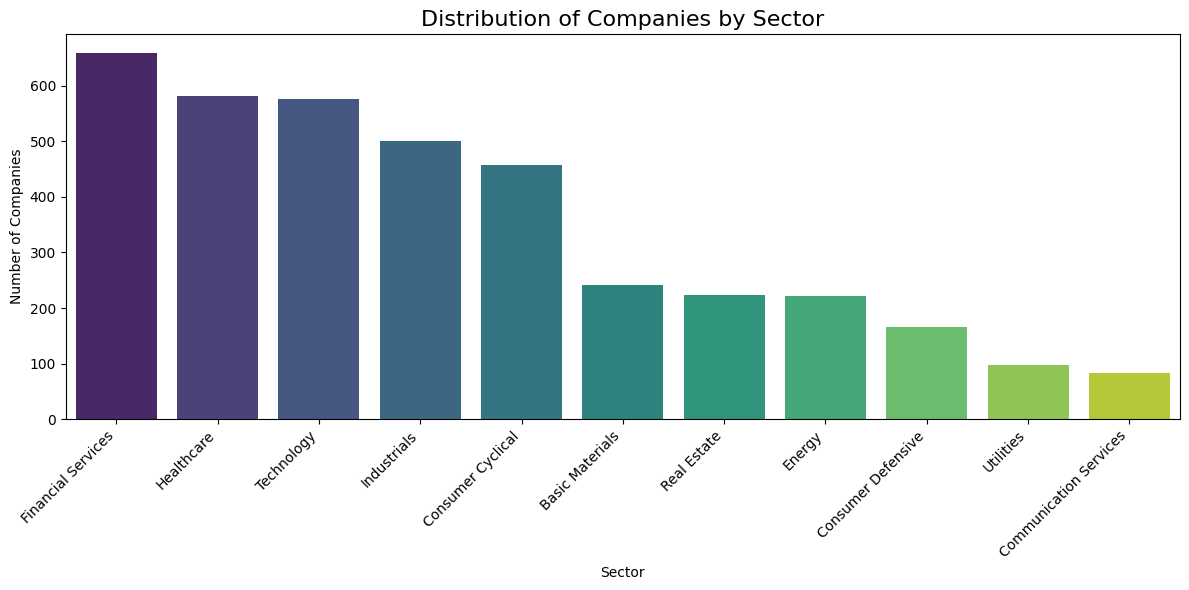

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# יצירת DataFrame מהתפלגות הסקטורים
sector_counts = df_financial_raw['Sector'].value_counts().reset_index()
sector_counts.columns = ['Sector', 'Count']

# גרף עמודות
plt.figure(figsize=(12, 6))
sns.barplot(data=sector_counts, x='Sector', y='Count', palette='viridis')

plt.title('Distribution of Companies by Sector', fontsize=16)
plt.xlabel('Sector')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




<div dir='rtl'>
בהתבסס על תוצאות ההתפלגות, ניתן לראות שהסקטורים לא מאוזנים באופן שווה.  
לצורך ניתוח ממוקד ואמין, בחרנו להתמקד רק בסקטורים שבהם קיימת כמות מספקת של חברות – כך שנוכל לחשב ממוצעים ולקבל קשרים בעלי תוקף סטטיסטי.
</div>

# orgenizing the data

<div dir='rtl'>
לאחר בחינת ההתפלגות, החלטנו להתמקד בחמישה סקטורים בעלי כמות חברות משמעותית:
`Financial Services`, `Healthcare`, `Technology`, `Industrials`, `Consumer Cyclical`.
סקטורים אלה נבחרו כדי להבטיח ניתוח מבוסס סטטיסטית, תוך הימנעות מעיוותים שיכולים להיגרם מסקטורים בעלי ייצוג נמוך.  
פער ההתפלגות בין הסקטור הגדול ביותר לקטן ביותר בקבוצה זו עומד על כ־5%, ואינו צפוי להשפיע מהותית על מהימנות המסקנות.
</div>


In [8]:
# הגדרת הסקטורים הרצויים
selected_sectors = ["Financial Services", "Healthcare", "Technology", "Industrials", "Consumer Cyclical"]


# סינון לפי סקטורים ורק שורות שלמות במדדים הפיננסיים
df_selected = df_financial_raw[df_financial_raw["Sector"].isin(selected_sectors)]
# יצירת מילון לפי סקטור
sector_groups = {
    sector: df_selected[df_selected["Sector"] == sector]
    for sector in selected_sectors
}


<div dir='rtl'>
ניסינו לבצע מטריצת קורלציה על כלל המדדים במאגר, אך עקב כמות העמודות הגדולה (מעל 100), המידע היה צפוף, לא ברור, ולא אפקטיבי לניתוח.  
לכן, החלטנו להתמקד רק במדדים שנבחרו מראש כרלוונטיים להשפעתם על תשואת מניה - מדדים אלו מוצגים ברשימת 
financial_metrics שלנו להלן.
</div>

In [9]:
financial_metrics = ["Revenue","Revenue Growth", "Net Income", "EPS" , "Total debt" , "Dividend Yield", "Earnings Yield", "Free Cash Flow Yield", "Net Profit Margin", "grossProfitMargin", "ROE", "returnOnAssets", "ROIC", "EBIT Growth", "Net Income Growth", "EPS Growth", "Dividends per Share Growth", "Free Cash Flow growth", "priceEarningsRatio", "priceToBookRatio", "priceToFreeCashFlowsRatio", "priceToOperatingCashFlowsRatio", "priceEarningsToGrowthRatio", "Enterprise Value over EBITDA", "EV to Free cash flow", "Market Cap", "Enterprise Value", "currentRatio", "quickRatio", "debtEquityRatio", "Net Debt to EBITDA", "Interest Coverage", "Operating Cash Flow" , "3Y Revenue Growth (per Share)", "5Y Revenue Growth (per Share)", "10Y Revenue Growth (per Share)"] 

df_financial_metrics = df_financial_raw[financial_metrics].dropna()
len(financial_metrics) 

36

## Part 1 – באילו סקטורים נרשמת תשואה שנתית ממוצעת גבוהה יותר, והאם קיימת עדיפות להשקעה בהם?

<div dir='rtl'>

- נחשב את ממוצע התשואה ([`2015 PRICE VAR [%]`] - [`2019 PRICE VAR [%]`]) בכל אחד מהסקטורים שנבחרו
- נבחן את סטיית התקן של התשואה כדי להבין את רמת הסיכון/תנודתיות
- נציג גרף barplot המשווה בין הסקטורים
- נסיק אילו סקטורים מציגים עדיפות להשקעה לפי תשואה ממוצעת ורמת סיכון

</div>


In [10]:
# עמודות התשואה השנתית
return_cols = ['2015 PRICE VAR [%]', '2016 PRICE VAR [%]', '2017 PRICE VAR [%]', '2018 PRICE VAR [%]', '2019 PRICE VAR [%]']

# יצירת טבלה עם הסקטור ועמודות התשואה בלבד
df_returns = df_selected[['Sector'] + return_cols].dropna()

# חישוב ממוצע תשואות לכל סקטור
avg_returns = df_returns.groupby('Sector')[return_cols].mean()
avg_returns['Mean Return'] = avg_returns.mean(axis=1)

# חישוב סטיית תקן לכל סקטור
std_returns = df_returns.groupby('Sector')[return_cols].std()
std_returns['STD Return'] = std_returns.std(axis=1)

# טבלה מסכמת
summary_df = pd.DataFrame({
    'Average Return (%)': avg_returns['Mean Return'],
    'Volatility (STD)': std_returns['STD Return']
}).reset_index()
summary_df


,Sector,Average Return (%),Volatility (STD)
0,Consumer Cyclical,5.790557,10.046875
1,Financial Services,11.589577,4.230350
2,Healthcare,6.275663,51.123832
3,Industrials,7.580500,9.038992
4,Technology,15.289533,46.251413


C:\Users\Noam\AppData\Local\Temp\ipykernel_32260\3861953854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(summary_df , x = 'Sector' , y = 'Average Return (%)' ,palette='viridis')


<Axes: xlabel='Sector', ylabel='Average Return (%)'>

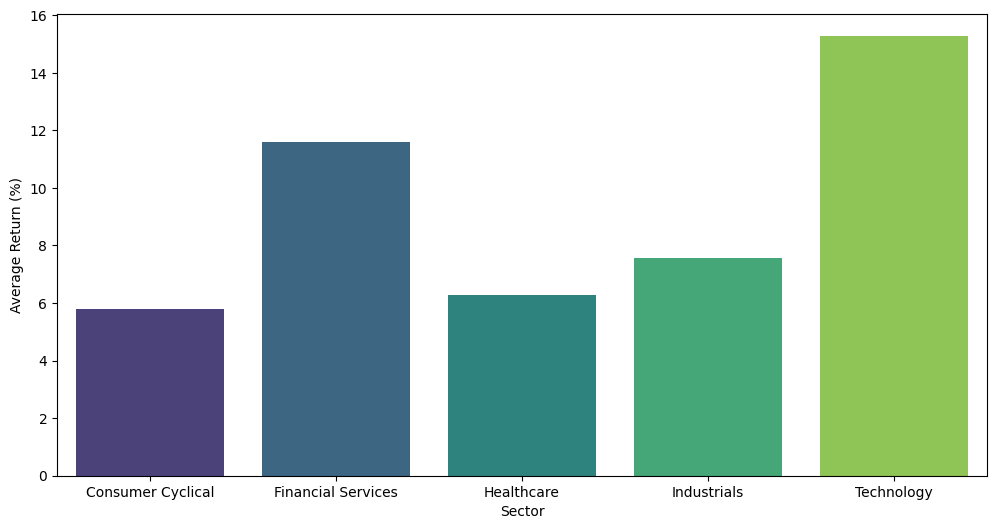

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(summary_df , x = 'Sector' , y = 'Average Return (%)' ,palette='viridis')

C:\Users\Noam\AppData\Local\Temp\ipykernel_32260\931163509.py:60: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Noam\AppData\Local\Temp\ipykernel_32260\931163509.py:60: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Noam\AppData\Local\Temp\ipykernel_32260\931163509.py:60: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Noam\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Noam\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Noam\AppData\Local

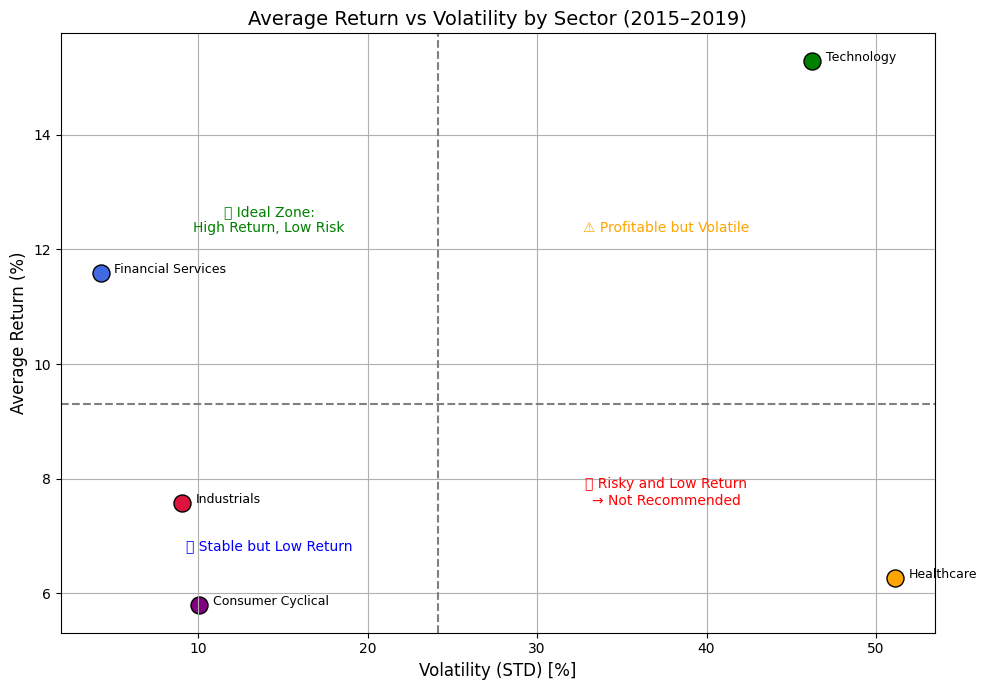

In [12]:
import matplotlib.pyplot as plt

# נתונים
x = summary_df['Volatility (STD)']
y = summary_df['Average Return (%)']
labels = summary_df['Sector']

# צבע שונה לכל סקטור
colors = {'Financial Services': 'royalblue','Healthcare': 'orange','Technology': 'green',
    'Industrials': 'crimson', 'Consumer Cyclical': 'purple'}
# ממוצעים – משמשים לחיתוך לרבעים
x_mean = x.mean()
y_mean = y.mean()

# יצירת גרף
plt.figure(figsize=(10, 7))

# ציור הנקודות לכל סקטור
for i in range(len(summary_df)):
    sector = labels[i]
    plt.scatter(
        x[i], y[i],
        s=150,
        color=colors[sector],
        edgecolor='black',
        label=sector)
    plt.text(x[i] + 0.8, y[i], sector, fontsize=9)

# קווי חיתוך לרבעים
plt.axhline(y_mean, color='gray', linestyle='--')
plt.axvline(x_mean, color='gray', linestyle='--')

# חישוב גבולות הצירים
x_min, x_max = x.min(), x.max()
y_min, y_max = y.min(), y.max()

# הוספת טקסט במרכז כל רבע (באנגלית, הערות בעברית)
plt.text((x_min + x_mean) / 2, (y_mean + y_max) / 2,
         '✅ Ideal Zone:\nHigh Return, Low Risk',
         fontsize=10, color='green', ha='center')

plt.text((x_mean + x_max) / 2, (y_mean + y_max) / 2,
         '⚠️ Profitable but Volatile',
         fontsize=10, color='orange', ha='center')

# כאן הזזה למטה של הרבע התחתון־שמאלי
plt.text((x_min + x_mean) / 2, (y_min + y_mean) / 2 - 0.8,
         '🔹 Stable but Low Return',
         fontsize=10, color='blue', ha='center')

plt.text((x_mean + x_max) / 2, (y_min + y_mean) / 2,
         '❌ Risky and Low Return\n→ Not Recommended',
         fontsize=10, color='red', ha='center')

# עיצוב סופי
plt.title('Average Return vs Volatility by Sector (2015–2019)', fontsize=14)
plt.xlabel('Volatility (STD) [%]', fontsize=12)
plt.ylabel('Average Return (%)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="direction: rtl; text-align: right;">

## 📊 סיכום ממצאים – מיקום סקטורים לפי תשואה וסטיית תקן (2015–2019)

### 🧭 משמעות כל רבע בגרף:

| רבע הגרף                          | מה הוא מייצג                                  | המלצה להשקעה             |
|-----------------------------------|-----------------------------------------------|---------------------------|
| ✅ **רביע שמאלי־עליון (ירוק)**     | תשואה גבוהה עם תנודתיות נמוכה – אידיאלי        | השקעה מומלצת              |
| ⚠️ **רביע ימני־עליון (כתום)**      | תשואה גבוהה אך תנודתיות גבוהה – רווחי אך תנודתי | בזהירות – למשקיע פעיל     |
| 🔹 **רביע שמאלי־תחתון (כחול)**     | תשואה נמוכה אך תנודתיות נמוכה – סולידי         | מתאים למשקיע זהיר         |
| ❌ **רביע ימני־תחתון (אדום)**      | גם תשואה נמוכה וגם תנודתיות גבוהה – הכי פחות כדאי | לא מומלץ בכלל              |

---

### 🎨 ניתוח לפי צבעי הסקטורים:

| סקטור                  | צבע בגרף      | מיקום ברבע הגרף     | מסקנה                                                                 |
|------------------------|----------------|----------------------|------------------------------------------------------------------------|
| **Financial Services** | 🔵 כחול כהה     | ✅ שמאלי־עליון        | תשואה גבוהה עם סיכון נמוך – סקטור אידיאלי להשקעה יציבה ורווחית         |
| **Technology**         | 🟢 ירוק         | ⚠️ ימני־עליון         | תשואה גבוהה אך תנודתיות – מתאים למשקיעים שמוכנים לקחת סיכון           |
| **Healthcare**         | 🟠 כתום         | ❌ ימני־תחתון       |גם תנודתי וגם לא רווחי – הכי פחות מועדף להשקעה                 |
| **Industrials**        | 🔴 אדום כהה     | 🔹 שמאלי־תחתון        | סקטור יציב אך עם תשואה נמוכה – מתאים למשקיע סולידי                    |
| **Consumer Cyclical**  | 🟣 סגול         |  🔹 שמאלי־תחתון         | תשואה נמוכה עם תנודתיות נמוכה – מתאים להשקעה לטווח ארוך אך יקח זמן להרוויח                        |

---

### 🧠 מסקנות כלליות:

- ✅ **סקטורים מומלצים:** Financial Services -  שילוב טוב של תשואה ויציבות
- ⚠️ **סיכון גבוה אך משתלם:** Technology  –  מתאים למשקיע אקטיבי
- 🔹 **סולידי אך איטי:** Industrials,Consumer Cyclical   –  לא מרוויח הרבה אבל שומר על יציבות
- ❌ **לא כדאי:** Healthcare  –  גם לא רווחי וגם תנודתי


## Part 2 –מהי עוצמת הקשר בין מדדים פיננסיים של חברות לבין התשואה הממוצעת של הסקטור בו הן פועלות?

<div dir='rtl'>

- נחשב ממוצע של מדדים פיננסיים עבור כל סקטור (על בסיס target_index)
- נחשב ממוצע של התשואה (`2015 PRICE VAR [%]`) בכל סקטור
- ניצור טבלת סקטורים שבה כל שורה כוללת ממוצעי מדדים + תשואה ממוצעת
- נבצע ניתוח קורלציה בין המדדים לבין התשואה כדי לזהות קשרים
- נזהה מהם המדדים המשפיעים ביותר על התשואה – בסקטור אחד או בכלל הסקטורים

</div>


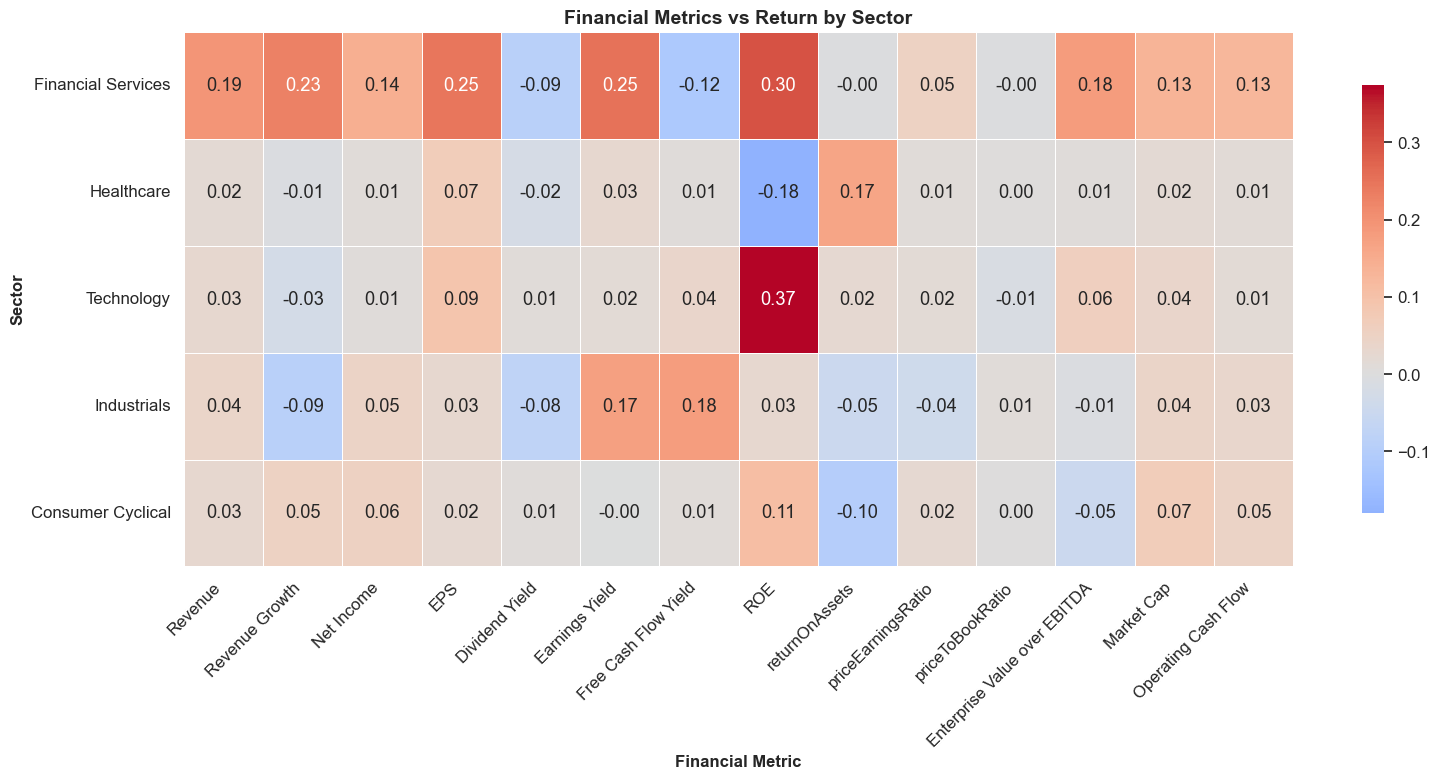

In [13]:
reduced_metrics = ["Revenue","Revenue Growth","Net Income","EPS","Dividend Yield","Earnings Yield","Free Cash Flow Yield","ROE",
    "returnOnAssets","priceEarningsRatio","priceToBookRatio","Enterprise Value over EBITDA","Market Cap","Operating Cash Flow"]

correlation_by_sector = {}

for sector in selected_sectors:
    sector_df = df_selected[df_selected['Sector'] == sector]
    
#כאן מחליפים - financial_metrics ל-reduced_metrics
    relevant_cols = reduced_metrics + ['2015 PRICE VAR [%]']
    
    sector_data = sector_df[relevant_cols].dropna()
    corr_matrix = sector_data.corr(numeric_only=True)
    corr_with_return = corr_matrix['2015 PRICE VAR [%]'].drop('2015 PRICE VAR [%]')
    
    correlation_by_sector[sector] = corr_with_return

correlation_df = pd.DataFrame({
    sector: correlation_by_sector[sector].reindex(reduced_metrics)
    for sector in selected_sectors}).T  # סקטורים כשורות

# הגדרות עיצוב
sns.set(style="whitegrid", font_scale=1.1)

# התאמה אוטומטית של גובה הגרף לפי כמות הסקטורים
fig_height = max(8, len(correlation_df) * 0.6)

#יצירת גרף
plt.figure(figsize=(16, fig_height))
sns.heatmap(correlation_df, annot=True, fmt=".2f", cmap='coolwarm' , center=0, linewidths=0.7,  cbar_kws={"shrink": 0.8})

#כותרות וצירים
plt.title("Financial Metrics vs Return by Sector", fontsize=14, weight='bold')
plt.xlabel("Financial Metric", fontsize=12, weight='bold')
plt.ylabel("Sector", fontsize=12, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<div style="direction: rtl; text-align: right;">

## 🔍 מה רואים בתמונות (לפי סקטור):
#### **Financial Services:**
  - המדד עם הקשר הגבוה ביותר לתשואה: **ROE** (0.30)
  - גם **EPS** ו- **Earnings Yield** עם קורלציה (0.25)
#### **Technology:**
  - הקשר החזק ביותר: **ROE** (0.37) – הכי חזק מבין כל הסקטורים!
  - רוב שאר המדדים עם קורלציה חלשה מאוד
#### **Healthcare:**
  - הקשרים חלשים מאוד – כמעט כל המדדים סביב 0 או שליליים
  - אפילו **ROE** עם קורלציה שלילית (−0.18)
#### **Industrials:**
  - קשר בינוני עם **Free Cash Flow Yield** (0.18) ו־**Earnings Yield** (0.17)
  - שאר המדדים כמעט ללא תרומה
#### **Consumer Cyclical:**
  - קשר חלש-בינוני עם **ROE** (0.11), **Net Income** (0.056), **Market Cap** (0.071)

### 🟩 **מסקנה:**
- **ROE** (תשואה על ההון העצמי) מופיע שוב ושוב כמדד המשפיע ביותר בכל הסקטורים
  (בעיקר ב־Technology ו־Financial Services).
- **אין מדד פיננסי אחד שהוא "מוביל מוחלט" בכל הסקטורים** – בכל סקטור יש דפוס שונה.
- **Healthcare** מתנהג יוצא דופן – ללא קשרים מובהקים, כנראה מושפע מגורמים חיצוניים (רגולציה, תרופות).
🎯 **אם בונים מודל חיזוי תשואה – צריך לבחון כל סקטור בנפרד, ולא להניח אחידות במדדים.**
</ul>

## Part 3 – האם ניתן לזהות חברות עם פוטנציאל תשואה גבוה בהתבסס על פרופיל פיננסי דומה לחברות שהניבו תשואה גבוהה בפועל?

<div dir='rtl'>

- נזהה את החברות עם תשואה גבוהה במיוחד (למשל: ה־20% העליונים בעמודת `2015 PRICE VAR [%]`)
- נחשב ממוצע של כל המדדים הפיננסיים (מתוך `target_index`) עבור אותן חברות
- נשווה כל חברה בפרויקט לפרופיל הזה – לפי מרחק או דמיון למדדים הממוצעים
- נדרג את כלל החברות לפי רמת הדמיון שלהן לחברות המצליחות
- נזהה חברות שדומות לפרופיל המצליח אך לא הניבו תשואה בפועל – אלה עשויות להיות בעלות פוטנציאל
- נציג טבלה של החברות עם הפוטנציאל הגבוה ביותר, כולל השוואה לסקטור ולביצועים בפועל

</div>


<div dir="rtl"> 

## הגדרת חברות "מצליחות" – ה - 20% העליונים בתשואה
</div>

In [14]:
relevant_metrics = ["Revenue","Revenue Growth", "Net Income", "EPS" , "Total debt" , "Dividend Yield", "Earnings Yield", "Free Cash Flow Yield", "Net Profit Margin", "grossProfitMargin", "ROE", "returnOnAssets", "ROIC", "EBIT Growth", "Net Income Growth", "EPS Growth", "Dividends per Share Growth", "Free Cash Flow growth", "priceEarningsRatio", "priceToBookRatio", "priceToFreeCashFlowsRatio", "priceToOperatingCashFlowsRatio", "priceEarningsToGrowthRatio", "Enterprise Value over EBITDA", "EV to Free cash flow", "Market Cap", "Enterprise Value", "currentRatio", "quickRatio", "debtEquityRatio", "Net Debt to EBITDA", "Interest Coverage", "Operating Cash Flow"] 

# חיתוך לפי אחוזון 80%
top_20_threshold = df_selected['2015 PRICE VAR [%]'].quantile(0.8)

# סינון החברות המובילות בתשואה
top_performers = df_selected[df_selected['2015 PRICE VAR [%]'] >= top_20_threshold]
top_performers

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,Operating Income,Interest Expense,Net Income,EPS,Dividend per Share,...,3Y Dividend per Share Growth (per Share),Asset Growth,Debt Growth,Sector,2015 PRICE VAR [%],Class,2016 PRICE VAR [%],2017 PRICE VAR [%],2018 PRICE VAR [%],2019 PRICE VAR [%]
409,GERN,1.153000e+06,-0.1013,0.000000e+00,1.153000e+06,-3.631200e+07,82000.0,-3.567000e+07,-0.2300,0.00,...,0.0,1.5616,0.0000,Healthcare,46.666673,1,-54.803494,-15.492965,-44.751379,30.769237
414,BSX,7.380000e+09,0.0332,2.210000e+09,5.170000e+09,-3.130000e+08,216000000.0,-1.190000e+08,-0.0900,0.00,...,0.0,0.0273,0.0009,Healthcare,39.485629,1,20.233460,13.299826,39.794301,31.224615
421,CNC,1.656000e+10,0.5244,1.465600e+10,1.904000e+09,4.640000e+08,35000000.0,2.710000e+08,1.1650,0.00,...,0.0,0.6503,0.3139,Healthcare,26.024504,1,-14.417690,73.006337,12.389129,11.274334
422,CI,3.491400e+10,0.0783,2.324100e+10,1.167300e+10,3.304000e+09,0.0,2.102000e+09,7.9700,0.04,...,0.0,0.0282,-0.0231,Healthcare,42.349495,1,-8.953863,49.678385,-6.218307,9.280306
423,SYNH,1.178799e+09,0.1846,8.841300e+08,2.946690e+08,6.364400e+07,53036000.0,-2.347000e+07,-0.5100,0.00,...,NaN,0.0067,-0.2998,Healthcare,94.584828,1,12.851315,-15.911283,-10.770975,51.066802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,NCTY,1.037728e+07,-0.3992,1.384930e+07,-3.472018e+06,-5.266825e+07,0.0,-1.398490e+07,-2.2522,0.00,...,0.0,-0.0732,0.0000,Technology,99.367094,1,-57.191782,-48.800001,-44.623658,-11.650480
3796,SSNT,2.146377e+07,0.2335,1.289071e+07,8.573064e+06,4.706510e+05,59750.0,1.929010e+05,0.0500,0.00,...,0.0,0.4166,0.3679,Technology,1041.666647,1,12.421789,43.662885,-42.997549,92.050968
3798,SVT,3.164600e+07,0.0441,2.452500e+07,7.121000e+06,-4.692000e+06,47000.0,-3.126000e+06,-1.4600,0.00,...,-1.0,0.1747,0.7355,Technology,42.116821,1,26.886057,11.731516,-8.715597,-11.218172
3799,TACT,5.310800e+07,-0.1169,3.139700e+07,2.171100e+07,-3.772000e+06,61000.0,-2.421000e+06,-0.2900,0.31,...,0.0,-0.1217,0.0000,Technology,61.571678,1,-24.393263,105.327916,-30.236833,21.679319



<div dir="rtl">

###  חישוב פרופיל פיננסי ממוצע של החברות המצליחות
</div>

In [15]:
top_profile = top_performers[relevant_metrics].mean() 
top_profile

Revenue                           2.605553e+09
Revenue Growth                    4.451580e-01
Net Income                        2.443705e+08
EPS                              -1.115362e+02
Total debt                        1.878687e+09
Dividend Yield                    8.534381e-03
Earnings Yield                   -5.471523e-01
Free Cash Flow Yield             -1.840072e-01
Net Profit Margin                -2.278112e+00
grossProfitMargin                 4.535579e-01
ROE                              -5.191453e-02
returnOnAssets                    7.477310e-01
ROIC                             -2.175482e-01
EBIT Growth                       2.578758e+01
Net Income Growth                 1.447470e+00
EPS Growth                        5.246288e-01
Dividends per Share Growth        1.135909e-01
Free Cash Flow growth            -3.629149e+00
priceEarningsRatio                2.362120e+01
priceToBookRatio                  5.624949e+00
priceToFreeCashFlowsRatio         3.264029e+01
priceToOperat

<div dir="rtl"> 

### השווינו כל חברה אחרת לפרופיל הזה


#### דירגנו את החברות לפי הקרבה לפרופיל המנצח
</div>
<div dir="rtl">
מדדנו מרחק ביניהם (Euclidean Distance) על סמך המדדים הפיננסיים בלבד
ככל שהמרחק קטן יותר – הפרופיל דומה יותר
</div>

In [16]:
df_clean = df_selected.dropna(subset=relevant_metrics).copy()

df_clean['DistanceFromTopProfile'] = df_clean[relevant_metrics].apply(
    lambda row: euclidean(row, top_profile), axis=1)


<div dir="rtl"> 

### דירגנו את החברות לפי הקרבה לפרופיל המנצח
</div>


In [17]:
df_ranked = df_clean.sort_values(by='DistanceFromTopProfile') 
df_ranked

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,Operating Income,Interest Expense,Net Income,EPS,Dividend per Share,...,Asset Growth,Debt Growth,Sector,2015 PRICE VAR [%],Class,2016 PRICE VAR [%],2017 PRICE VAR [%],2018 PRICE VAR [%],2019 PRICE VAR [%],DistanceFromTopProfile
2682,LM,2.741757e+09,0.0494,0.000000e+00,2.741757e+09,6.268800e+08,52911000.0,2.847840e+08,2.34,0.520,...,-0.0218,-0.1723,Financial Services,-25.732717,0,-22.192701,40.532521,-35.980483,45.632299,1.108356e+09
1535,IEX,2.147767e+09,0.0611,1.198452e+09,9.493150e+08,4.312240e+08,41895000.0,2.793860e+08,3.48,1.070,...,0.0055,0.1104,Industrials,-0.014723,0,20.874485,46.642918,-2.946700,39.279513,1.168202e+09
1527,ALLE,2.118300e+09,0.0235,1.264600e+09,8.537000e+08,3.263000e+08,53800000.0,1.752000e+08,1.82,0.320,...,0.0076,-0.0590,Industrials,20.531086,1,-0.096695,23.966594,0.731998,55.279316,1.232403e+09
3474,OTEX,1.624699e+09,0.1917,5.107420e+08,1.113957e+09,3.005280e+08,27934000.0,2.181250e+08,0.91,0.311,...,0.4689,1.3331,Technology,-15.453909,0,31.736433,17.811053,-4.808033,38.210565,1.296755e+09
1120,DPZ,1.993833e+09,0.1063,1.399067e+09,5.947660e+08,3.453610e+08,86881000.0,1.625870e+08,2.96,1.000,...,0.1353,-0.0230,Consumer Cyclical,19.365215,1,45.780000,20.488256,33.800653,21.935889,1.306425e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,FB,1.246600e+10,0.5836,2.153000e+09,1.031300e+10,4.994000e+09,0.0,2.940000e+09,1.12,0.000,...,1.2334,-0.5105,Technology,33.409825,1,12.551361,51.001203,-27.742257,51.275067,2.920858e+11
413,JNJ,7.433100e+10,0.0423,2.274600e+10,5.158500e+10,2.095900e+10,482000000.0,1.383100e+10,5.80,2.590,...,-0.0175,0.1247,Healthcare,1.190574,1,15.330000,23.748559,-4.797608,17.402705,4.059803e+11
3235,MSFT,8.683300e+10,0.1154,2.707800e+10,5.975500e+10,2.775900e+10,0.0,2.207400e+10,2.66,1.070,...,0.2103,0.4516,Technology,21.878487,1,16.505711,39.741123,20.219087,58.259263,4.456689e+11
3286,GOOGL,6.600100e+10,0.1888,2.569100e+10,4.031000e+10,1.649600e+10,0.0,1.413600e+10,20.91,0.000,...,0.1647,-0.0015,Technology,46.919087,1,4.346625,30.369675,-2.632290,26.994913,4.655978e+11


<div dir="rtl"> 

### בחרנו את החברות שהכי קרובות לפרופיל - אך לא השיגו תשואה גבוהה בפועל
#### כי אנחנו רוצים את החברות עם הפוטנציאל הלא ממומש לאותה שנה 

</div> 

In [18]:
avg_return = df_clean['2015 PRICE VAR [%]'].mean()

potential_candidates = df_ranked[
    df_ranked['2015 PRICE VAR [%]'] < avg_return
].head(10)
potential_candidates

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,Operating Income,Interest Expense,Net Income,EPS,Dividend per Share,...,Asset Growth,Debt Growth,Sector,2015 PRICE VAR [%],Class,2016 PRICE VAR [%],2017 PRICE VAR [%],2018 PRICE VAR [%],2019 PRICE VAR [%],DistanceFromTopProfile
2682,LM,2.741757e+09,0.0494,0.000000e+00,2.741757e+09,626880000.0,52911000.0,284784000.0,2.34,0.520,...,-0.0218,-0.1723,Financial Services,-25.732717,0,-22.192701,40.532521,-35.980483,45.632299,1.108356e+09
3474,OTEX,1.624699e+09,0.1917,5.107420e+08,1.113957e+09,300528000.0,27934000.0,218125000.0,0.91,0.311,...,0.4689,1.3331,Technology,-15.453909,0,31.736433,17.811053,-4.808033,38.210565,1.296755e+09
3467,KEYS,2.933000e+09,0.0156,1.313000e+09,1.620000e+09,469000000.0,3000000.0,392000000.0,2.35,0.000,...,0.5039,0.0000,Technology,-15.230397,0,31.499462,14.663726,47.283510,67.095409,1.426364e+09
3515,HUBB,3.359400e+09,0.0551,2.250400e+09,1.109000e+09,517400000.0,31200000.0,325300000.0,5.51,2.060,...,0.0417,-0.0020,Technology,-3.928977,0,17.277423,17.878238,-23.964681,53.374643,1.497350e+09
3339,TDC,2.732000e+09,0.0149,1.253000e+09,1.479000e+09,503000000.0,3000000.0,367000000.0,2.36,3.700,...,0.0116,0.7080,Technology,-39.954545,0,3.504762,39.448873,-0.337753,-29.086091,1.507055e+09
1225,WBC,2.851000e+09,0.0480,1.979300e+09,8.717000e+08,331000000.0,-200000.0,291500000.0,4.87,0.000,...,0.0167,2.6188,Consumer Cyclical,-3.190377,0,4.943154,32.637024,-25.875286,25.882572,1.609847e+09
1655,MSM,2.787122e+09,0.1341,1.500866e+09,1.286256e+09,383184000.0,3874000.0,236067000.0,3.78,1.320,...,0.0606,0.3179,Industrials,-29.092381,0,68.388613,7.405827,-18.710234,7.250601,1.702415e+09
1670,GWR,1.639012e+09,0.0449,5.066440e+08,1.132368e+09,421571000.0,56162000.0,260755000.0,4.71,0.000,...,0.0519,-0.0057,Industrials,-39.741864,0,29.520439,14.051868,-7.923875,51.393769,1.710574e+09
1620,DCI,2.473500e+09,0.0150,1.595700e+09,8.778000e+08,355700000.0,10200000.0,260200000.0,1.79,0.575,...,0.1141,1.0452,Industrials,-24.002653,0,50.906652,17.661776,-9.972105,36.141005,1.750116e+09
3393,TRMB,2.395500e+09,0.0469,1.104700e+09,1.290800e+09,260800000.0,17600000.0,218900000.0,0.82,0.000,...,0.0668,0.6143,Technology,-20.289852,0,39.647982,34.258338,-19.849005,28.395433,1.823185e+09


##  הצגנו את 10 המועמדות הכי מעניינות להשקעה

In [19]:
potential_candidates[['Unnamed: 0', 'Sector', '2015 PRICE VAR [%]', 'DistanceFromTopProfile']]


,Unnamed: 0,Sector,2015 PRICE VAR [%],DistanceFromTopProfile
2682,LM,Financial Services,-25.732717,1.108356e+09
3474,OTEX,Technology,-15.453909,1.296755e+09
3467,KEYS,Technology,-15.230397,1.426364e+09
3515,HUBB,Technology,-3.928977,1.497350e+09
3339,TDC,Technology,-39.954545,1.507055e+09
1225,WBC,Consumer Cyclical,-3.190377,1.609847e+09
1655,MSM,Industrials,-29.092381,1.702415e+09
1670,GWR,Industrials,-39.741864,1.710574e+09
1620,DCI,Industrials,-24.002653,1.750116e+09
3393,TRMB,Technology,-20.289852,1.823185e+09


## תצוגה גרפית של 10 החברות העונות לפרופיל מול שאר החברות בטבלה
- התצוגה מראה איפה החברותשהבחרו עומדות מול שאר החברות שנמצאו בהשוואה
- בעיקר בדיקה של בחירת החברות אם הם באמת קרובות לפרופיל לעומת אחרות

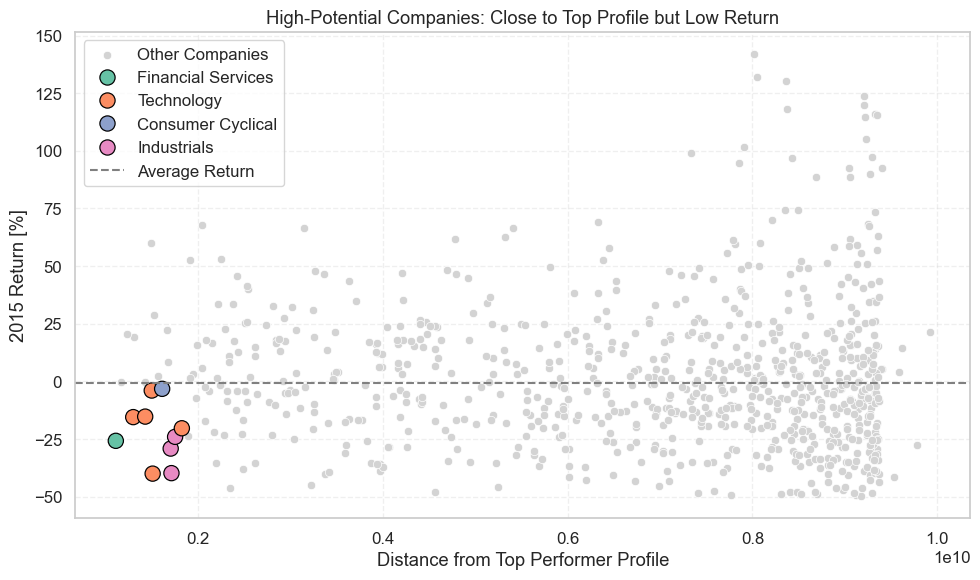

In [20]:
# סינון ערכים קיצוניים בציר X ו-Y
df_viz = df_clean[
    (df_clean['2015 PRICE VAR [%]'] > -50) & 
    (df_clean['2015 PRICE VAR [%]'] < 150) &
    (df_clean['DistanceFromTopProfile'] < 1e10)  # מקסימום 10 מיליארד
].copy()

plt.figure(figsize=(10, 6))

# כלל החברות באפור
sns.scatterplot(
    data=df_viz,
    x='DistanceFromTopProfile',
    y='2015 PRICE VAR [%]',
    color='lightgray',
    label='Other Companies'
)

# המועמדות לפוטנציאל – בצבע ובמסגרת
sns.scatterplot(
    data=potential_candidates,
    x='DistanceFromTopProfile',
    y='2015 PRICE VAR [%]',
    hue='Sector',
    palette='Set2',
    s=120,
    edgecolor='black'
)

plt.axhline(avg_return, color='gray', linestyle='--', label='Average Return')
plt.title('High-Potential Companies: Close to Top Profile but Low Return')
plt.xlabel('Distance from Top Performer Profile')
plt.ylabel('2015 Return [%]')
plt.grid(axis='both', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.legend()
plt.show()




#### 🧮 פרופיל תשואה של חברות פוטנציאליות לעומת ממוצע הסקטור(2015 - 2019)

In [21]:
# מיזוג בין המועמדות לבין ממוצע הסקטור בו הן פועלות
merged = potential_candidates.merge(summary_df, on='Sector')

# בחירת עמודות להצגה
comparison_table = merged[['2016 PRICE VAR [%]',
    'Unnamed: 0', 'Sector', '2015 PRICE VAR [%]', 'Average Return (%)', 'DistanceFromTopProfile'
]].rename(columns={
    'Unnamed: 0': 'Symbol',
    '2015 PRICE VAR [%]': 'Return 2015 [%]',
    'Average Return (%)': 'Sector Avg Return [%]',
    'Volatility (STD)': 'Sector Volatility'
})

comparison_table

,2016 PRICE VAR [%],Symbol,Sector,Return 2015 [%],Sector Avg Return [%],DistanceFromTopProfile
0,-22.192701,LM,Financial Services,-25.732717,11.589577,1.108356e+09
1,31.736433,OTEX,Technology,-15.453909,15.289533,1.296755e+09
2,31.499462,KEYS,Technology,-15.230397,15.289533,1.426364e+09
3,17.277423,HUBB,Technology,-3.928977,15.289533,1.497350e+09
4,3.504762,TDC,Technology,-39.954545,15.289533,1.507055e+09
5,4.943154,WBC,Consumer Cyclical,-3.190377,5.790557,1.609847e+09
6,68.388613,MSM,Industrials,-29.092381,7.580500,1.702415e+09
7,29.520439,GWR,Industrials,-39.741864,7.580500,1.710574e+09
8,50.906652,DCI,Industrials,-24.002653,7.580500,1.750116e+09
9,39.647982,TRMB,Technology,-20.289852,15.289533,1.823185e+09


<div dir="rtl"> 

### השוואת תשואת חברות פוטנציאליות לתשואת הסקטור (2015–2019)
#### הגרף מציג שלוש עמודות לכל חברה: 
- תשואת החברה בשנת 2015 (כשהיא נבחרה לפי פרופיל דומה)
- ממוצע הסקטור בשנת 2015 - 2019
- תשואת החברה בשנת 2016
כך ניתן לבדוק האם החברה מימשה את הפוטנציאל שהוערך לה על סמך הפרופיל הפיננסי

</div> 

<div dir="rtl"> 

### השוואה בגרף עמודות

</div> 

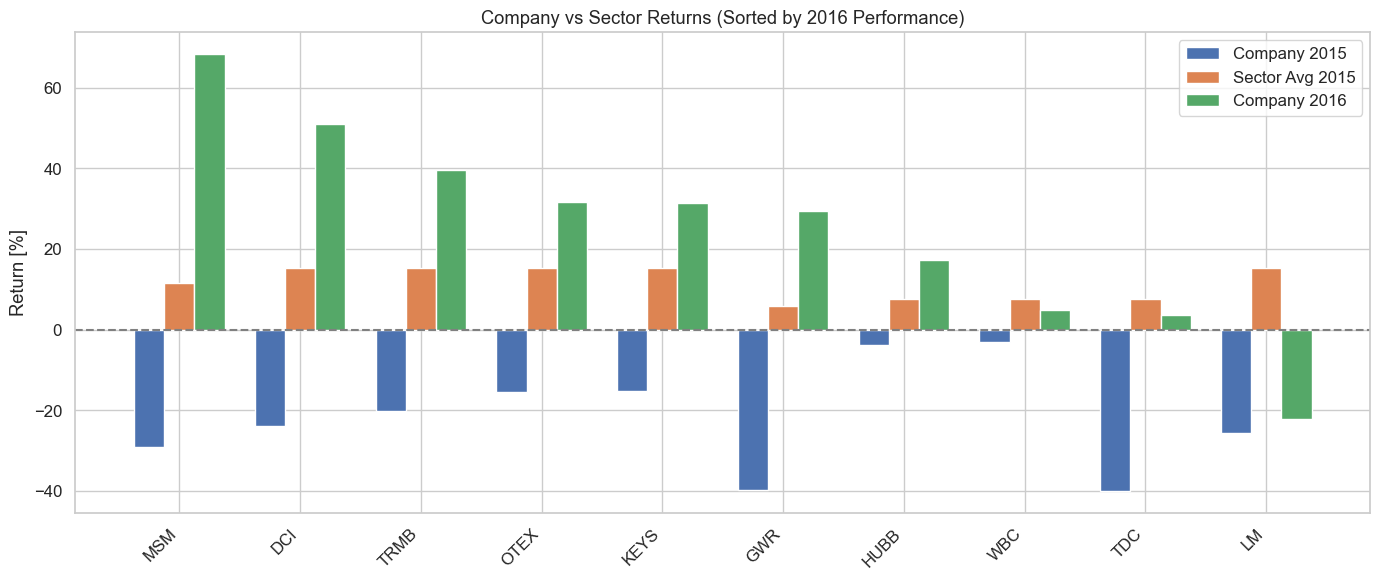

In [22]:
# מיון החברות לפי תשואת 2016 מהגבוה לנמוך
sorted_df = comparison_table.sort_values(by='2016 PRICE VAR [%]', ascending=False).reset_index(drop=True)

# הגדרת שמות החברות לאחר מיון
companies = sorted_df['Symbol']
x = np.arange(len(companies))
width = 0.25

fig, ax = plt.subplots(figsize=(14, 6))

# גרף עמודות – שלוש לכל חברה
ax.bar(x - width, sorted_df['Return 2015 [%]'], width, label='Company 2015')
ax.bar(x, comparison_table.loc[sorted_df.index]["Sector Avg Return [%]"], width, label='Sector Avg 2015')
ax.bar(x + width, sorted_df['2016 PRICE VAR [%]'], width, label='Company 2016')

# עיצוב
ax.set_xticks(x)
ax.set_xticklabels(companies, rotation=45, ha='right')
ax.set_ylabel('Return [%]')
ax.set_title('Company vs Sector Returns (Sorted by 2016 Performance)')
ax.legend()
ax.axhline(0, color='gray', linestyle='--')

plt.tight_layout()
plt.show()



<div dir="rtl"> 



### 🔍 מה מראה הגרף:
#### הגרף מציג שלוש עמודות לכל אחת מ־10 החברות שנמצאו קרובות לפרופיל הפיננסי של החברות המובילות:
  - תשואת החברה בשנת 2015 (שהייתה נמוכה בפועל)
  - ממוצע הסקטור שבו פועלת החברה בשנת 2015
  - תשואת החברה בשנת 2016 (שנה לאחר בחינת הדמיון לפרופיל המנצח)
- ניתן לראות שיפור ניכר בתשואה של רבות מהחברות בשנת 2016, במיוחד אלו מהסקטורים Technology ו -Industrials.

### 🟩 מסקנה:
- הממצאים מחזקים את ההנחה שהשוואת פרופיל פיננסי לחברות מצליחות יכולה **לזהות פוטנציאל השקעה סמוי**.
- אמנם בשנת 2015 אותן חברות לא ביצעו תשואה גבוהה, אך רובן **השיגו ביצועים טובים משמעותית ב־2016**, לעיתים אף **עקפו את ממוצע הסקטור שלהן**.
- הדבר מרמז ש־**הפרופיל הפיננסי הוא אינדיקטור מקדים חיובי** להשקעה – גם אם לא מידית, אלא תוך שנה.

🎯 **המסקנה שלנו מתחזקת: חברות עם פרופיל פיננסי שלא מצליחות – לעיתים מצליחות בפועל בהמשך.**


<div dir="rtl"> 

## <span> **summary - סיכום** </span>
</div> 
<div dir="rtl"> 
בפרויקט זה ניתחנו את הקשר בין מדדים פיננסיים של חברות לבין תשואת המניה בשנים שלאחר מכן, במטרה לבדוק האם ניתן
לזהות **פוטנציאל השקעה** על סמך נתונים קודמים.
</div> 
<div dir="rtl"> 
העבודה התבססה על נתונים פיננסיים לשנת 2014 של חברות מחמישה סקטורים מובילים, ונבחנה התשואה שלהן בשנים 2015–2019.

### 🔍 הממצאים המרכזיים:
- אין מדד פיננסי בודד שמאפשר חיזוי מובהק של תשואה בכל הסקטורים.
- לעומת זאת, פרופילים פיננסיים של חברות מצליחות שימשו כבסיס לאיתור מועמדות חדשות להשקעה – בהן נצפתה לעיתים עלייה בתשואה בשנה שלאחר מכן.

### ✅ מסקנה:
שילוב של מספר מדדים פיננסיים מאפשר לזהות חברות עם **פוטנציאל תשואה גבוה**, גם אם טרם הניבו תוצאות בפועל – ובכך לתמוך בקבלת החלטות השקעה מבוססת־נתונים.
</div>
